In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Student_Performance.csv')
dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
dataset.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
dataset.describe

<bound method NDFrame.describe of       Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      Sample Question Papers Practiced  Performance Index  
0                                    1               91.0  
1                                    2               65.0  
2                                    2               45.0  
3                                    2               36.0  
4                                    5               66.0  
...                                ...                ...  
9995                                 2               23.0  
9996                                 5               58.0  
9997                                 5               74.0  
9998                                 0               95.0  
9999                                 1               64.0  

[10000 rows x 6 columns]>

TASK 1. Apply multiple regression to another dataset of your own choice. Try for different train-test split and random states.

In [23]:
# Defining features (X) and target (y)
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [24]:
# One-hot encoding the categorical column "Extracurricular Activities"
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [25]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [27]:
# Train and predict
multi_regressor = LinearRegression()
multi_regressor.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = multi_regressor.predict(X_test)

In [29]:
print(multi_regressor.coef_)
print(multi_regressor.intercept_)

[0.55955086 2.85442232 1.01984531 0.48506508 0.19447807]
-34.17650031064231


In [31]:
# Sample input for prediction
# Assume: Extracurricular = "Yes", Hours Studied = 7, Previous Scores = 99, Sleep Hours = 9, Sample Papers Practiced = 1
sample_input = [[1, 7, 99, 9, 1]]  # Adjusted to match the feature order
predicted_value = multi_regressor.predict(sample_input)

In [32]:
# Print the prediction
print(f"Predicted Performance Index for {sample_input}: {predicted_value[0]}")

Predicted Performance Index for [[1, 7, 99, 9, 1]]: 91.88875669386742


In [37]:
# Sample input for prediction
# Assume: Extracurricular = "No", Hours Studied = 4, Previous Scores = 82, Sleep Hours = 4, Sample Papers Practiced = 2
sample_input = [[0, 4, 82, 4, 2]]  # Adjusted to match the feature order
predicted_value = multi_regressor.predict(sample_input)

In [38]:
# Print the prediction
print(f"Predicted Performance Index for {sample_input}: {predicted_value[0]}")

Predicted Performance Index for [[0, 4, 82, 4, 2]]: 63.19772119073262


In [39]:
# Performance metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
variance_score = multi_regressor.score(X_test, y_test)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, Variance Score (R²): {variance_score}")

MAE: 1.612514837029367, MSE: 4.133381390974708, RMSE: 2.0330719099369574, Variance Score (R²): 0.9890969000618695


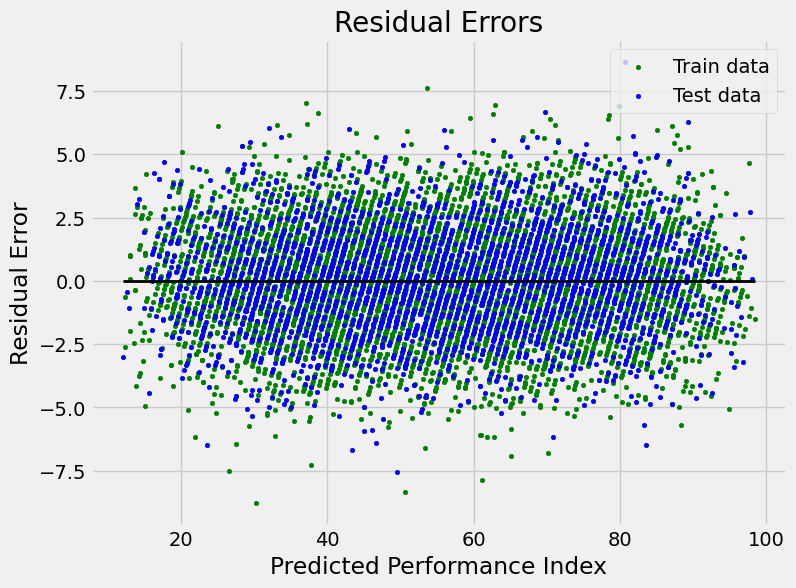

In [42]:
# Generate predictions for train and test sets
y_train_pred = multi_regressor.predict(X_train)
y_test_pred = multi_regressor.predict(X_test)

# Plot residual errors
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 6))

# Train data residuals
plt.scatter(y_train_pred, y_train_pred - y_train, color="green", s=10, label="Train data")

# Test data residuals
plt.scatter(y_test_pred, y_test_pred - y_test, color="blue", s=10, label="Test data")

# Horizontal line at y=0 for reference
plt.hlines(y=0, xmin=min(y_train_pred.min(), y_test_pred.min()),
           xmax=max(y_train_pred.max(), y_test_pred.max()),
           linewidth=2, color="black")

# Add plot title and labels
plt.title("Residual Errors")
plt.xlabel("Predicted Performance Index")
plt.ylabel("Residual Error")
plt.legend(loc="upper right")

# Show plot
plt.show()


TASK 2. For the given dataset (or for a dataset of your choice), run multiple regression on a subset of predictors and observe the differences in your model’s performance.

In [48]:
# Selecting a subset of predictors: "Hours Studied" and "Previous Scores"
subset_X = dataset[['Hours Studied', 'Previous Scores']].values
y = dataset['Performance Index'].values  # Target variable

In [50]:
X_train, X_test, y_train, y_test = train_test_split(subset_X, y, test_size=0.3, random_state=2)

In [51]:
# Training the model on the subset of predictors
multi_regressor_subset = LinearRegression()
multi_regressor_subset.fit(X_train, y_train)

LinearRegression()

In [52]:
# Making predictions
y_pred_subset = multi_regressor_subset.predict(X_test)

In [55]:
# Sample input for prediction
# Example: Hours Studied = 7, Previous Scores = 99
sample_input_subset = [[7, 99]]
predicted_value_subset = multi_regressor_subset.predict(sample_input_subset)
print(f"Predicted Performance Index for {sample_input_subset}: {predicted_value_subset[0]:.2f}")

Predicted Performance Index for [[7, 99]]: 91.12


In [56]:
# Sample input for prediction
# Example: Hours Studied = 7, Previous Scores = 74
sample_input_subset = [[7, 74]]
predicted_value_subset = multi_regressor_subset.predict(sample_input_subset)
print(f"Predicted Performance Index for {sample_input_subset}: {predicted_value_subset[0]:.2f}")

Predicted Performance Index for [[7, 74]]: 65.62


In [57]:
# Performance metrics
mae_subset = metrics.mean_absolute_error(y_test, y_pred_subset)
mse_subset = metrics.mean_squared_error(y_test, y_pred_subset)
rmse_subset = np.sqrt(mse_subset)
variance_score_subset = multi_regressor_subset.score(X_test, y_test)

print(f"Subset MAE: {mae_subset:.2f}")
print(f"Subset MSE: {mse_subset:.2f}")
print(f"Subset RMSE: {rmse_subset:.2f}")
print(f"Subset Variance Score (R²): {variance_score_subset:.2f}")

Subset MAE: 1.82
Subset MSE: 5.20
Subset RMSE: 2.28
Subset Variance Score (R²): 0.99


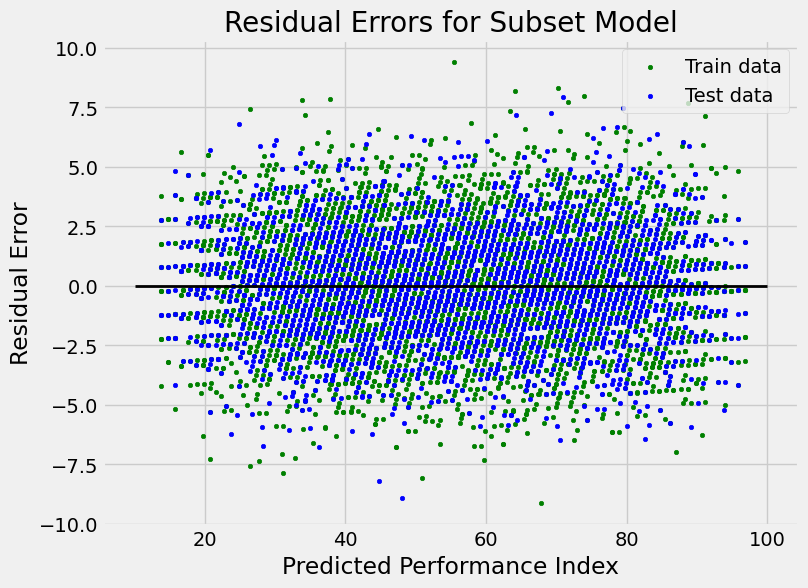

In [58]:
# Residual error plot for subset model
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 6))

# Train data residuals
plt.scatter(multi_regressor_subset.predict(X_train),
            multi_regressor_subset.predict(X_train) - y_train,
            color="green", s=10, label="Train data")

# Test data residuals
plt.scatter(multi_regressor_subset.predict(X_test),
            multi_regressor_subset.predict(X_test) - y_test,
            color="blue", s=10, label="Test data")

# Horizontal line at y=0 for reference
plt.hlines(y=0, xmin=min(y_train), xmax=max(y_train), linewidth=2, color="black")

# Add plot title and labels
plt.title("Residual Errors for Subset Model")
plt.xlabel("Predicted Performance Index")
plt.ylabel("Residual Error")
plt.legend(loc="upper right")

# Show plot
plt.show()

**POLYNOMIAL REGRESSION**

TASK 4. For a dataset of your choice, repeat the same process for polynomial regression.

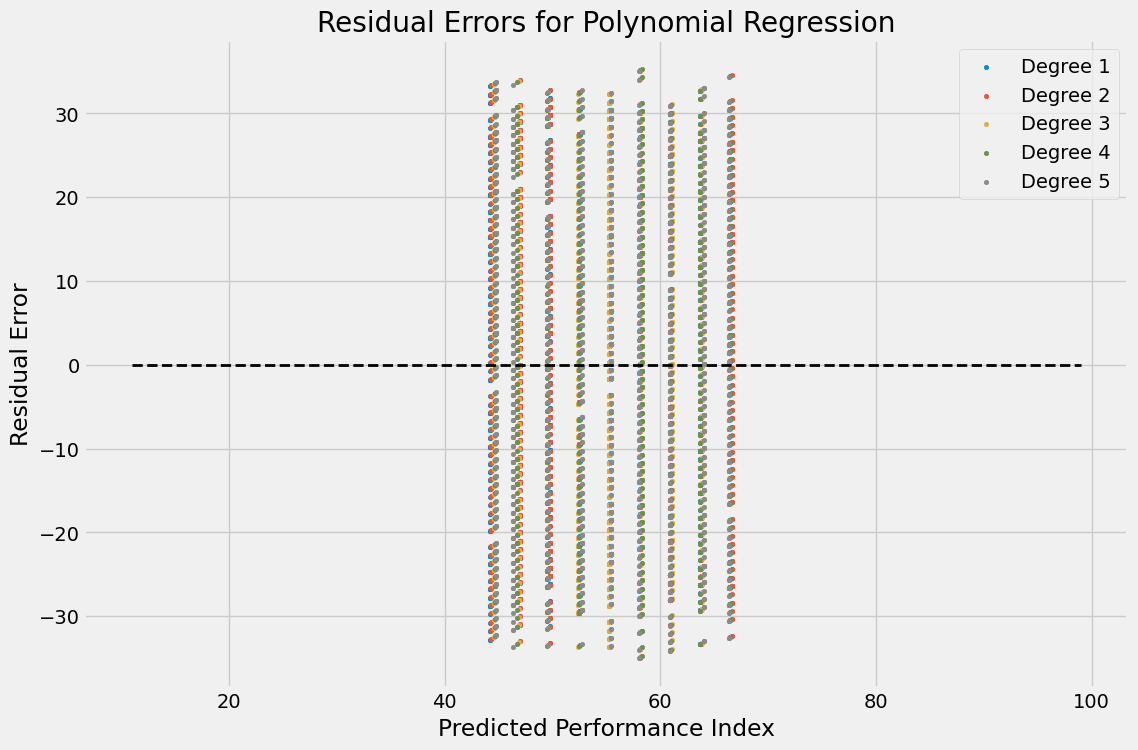

   Degree        MAE         MSE       RMSE        R²
0       1  15.533894  321.814538  17.939190  0.131604
1       2  15.538787  322.004165  17.944474  0.131093
2       3  15.540678  322.088066  17.946812  0.130866
3       4  15.546105  322.181664  17.949420  0.130614
4       5  15.545186  322.129116  17.947956  0.130755


In [59]:
# Select "Hours Studied" as predictor and "Performance Index" as target
X = dataset[['Hours Studied']].values
y = dataset['Performance Index'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to perform polynomial regression for different degrees and evaluate performance
def polynomial_regression(X_train, X_test, y_train, y_test, degrees):
    results = []
    plt.figure(figsize=(12, 8))

    for degree in degrees:
        # Transform data for polynomial regression
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Train the model
        poly_regressor = LinearRegression()
        poly_regressor.fit(X_train_poly, y_train)

        # Predict on test set
        y_pred = poly_regressor.predict(X_test_poly)

        # Calculate performance metrics
        mae = metrics.mean_absolute_error(y_test, y_pred)
        mse = metrics.mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = poly_regressor.score(X_test_poly, y_test)
        results.append((degree, mae, mse, rmse, r2))

        # Plot residual errors
        plt.scatter(y_pred, y_pred - y_test, s=10, label=f'Degree {degree}')

    # Plot configuration
    plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors='black', linestyles='dashed', linewidth=2)
    plt.title("Residual Errors for Polynomial Regression")
    plt.xlabel("Predicted Performance Index")
    plt.ylabel("Residual Error")
    plt.legend()
    plt.show()

    # Display performance metrics
    results_df = pd.DataFrame(results, columns=["Degree", "MAE", "MSE", "RMSE", "R²"])
    return results_df

# Test for polynomial degrees 1 to 5
degrees = [1, 2, 3, 4, 5]
results_df = polynomial_regression(X_train, X_test, y_train, y_test, degrees)

# Display the results
print(results_df)